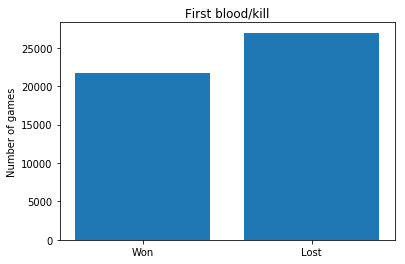

Pozanimali smo se, če ekipa, ki dobi prvi kill, če ima večjo možnost za zmago. Presenetljivo so rezultati nasprotni od pričakovanih. Če malo razmišljamo, lahko predvidevamo, da ekipa, ki dobi prvi kill, da ima kanček več možnosti za zmago, vendar v tem primeru ni tako.


In [57]:
from csv import DictReader
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


reader = DictReader(open('tabele/objectives.csv', 'rt', encoding='utf-8'))
timeFirst = dict()
firstKill = dict()
for row in reader:
    matchIdObj = row["match_id"]
    time = row["time"]
    subtype = row["subtype"]
    player1 = row["player1"]
    if(subtype == "CHAT_MESSAGE_FIRSTBLOOD"):
        firstKill[matchIdObj] = int(player1)
        timeFirst[matchIdObj] = int(time)
        
reader = DictReader(open('tabele/match.csv', 'rt', encoding='utf-8'))

wins = []
for row in reader:
    matchIdPla = row["match_id"]
    win = row["radiant_win"]
    if(matchIdPla in firstKill):
        if((win == "True" and firstKill[matchIdPla] > 4) or (win == "False" and firstKill[matchIdPla] < 5)):
            wins.append(True)
        else:
            wins.append(False)

x = np.arange(2)
plt.bar(x, height= [sum(wins),len(wins)-sum(wins)])
plt.xticks(x, ['Won','Lost'])
plt.title("First blood/kill")
plt.ylabel('Number of games')
plt.show()

print("Pozanimali smo se, če ekipa, ki dobi prvi kill, če ima večjo možnost za zmago. Presenetljivo so rezultati nasprotni od pričakovanih. Če malo razmišljamo, lahko predvidevamo, da ekipa, ki dobi prvi kill, da ima kanček več možnosti za zmago, vendar v tem primeru ni tako.")

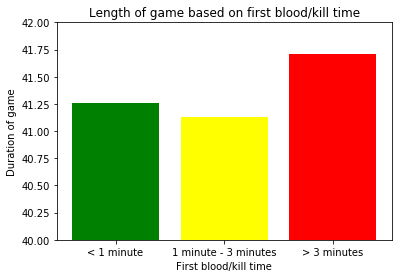

Čas prvega killa se ne navezuje na trajanje igre, kar lahko vidimo v zgornjem grafu. V primeru, če je bil prvi kill izveden v obdobju po 3 minutah se je v povprečju igra podalšala za pol minute, kar pa se pri 40 minutah igre praktično ne pozna.


In [79]:
reader = DictReader(open('tabele/match.csv', 'rt', encoding='utf-8'))

toOneSize = 0
toOne = 0
toThreeSize = 0
toThree = 0
fromThreeSize = 0
fromThree = 0

for row in reader:
    matchId = row["match_id"]
    duration = int(row["duration"])
    if(matchId in timeFirst):
        if(timeFirst[matchId] > 0):
            if(timeFirst[matchId]/60 <= 1):
                toOneSize +=1
                toOne += duration
            elif(timeFirst[matchId]/60 <= 3):
                toThreeSize +=1
                toThree += duration
            else:
                fromThreeSize +=1
                fromThree += duration

x = np.arange(3)
plt.bar(x, height= [toOne/toOneSize/60,toThree/toThreeSize/60,fromThree/fromThreeSize/60], color=["green","yellow","red"])
plt.xticks(x, ['< 1 minute','1 minute - 3 minutes',"> 3 minutes"])
plt.title("Length of game based on first blood/kill time")
plt.ylabel('Duration of game')
plt.xlabel('First blood/kill time')
plt.ylim(40,42)
plt.show()

print("Čas prvega killa se ne navezuje na trajanje igre, kar lahko vidimo v zgornjem grafu. V primeru, če je bil prvi kill izveden v obdobju po 3 minutah se je v povprečju igra podalšala za pol minute, kar pa se pri 40 minutah igre praktično ne pozna.")

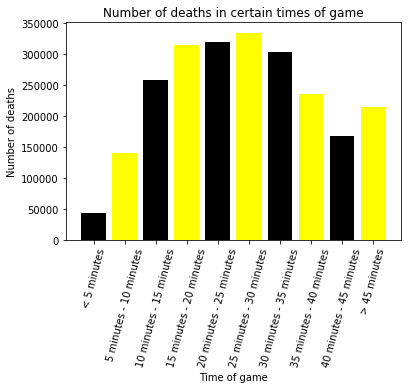

Na grafu lahko opazimo da se večina dogajanja zgodi na sredini igre. To lahko tudi sami predvidevamo, saj se v tej fazi nadgrajuje heroje in pridobi večina xpja in zlata. Pri samem koncu lahko vidimo rahel dvig, saj se igra konča na eni strani mapi se pravi bodo vsi heroji na zelo malem prostoru.


In [98]:
reader = DictReader(open('tabele/teamfights.csv', 'rt', encoding='utf-8'))

numberOfDeaths = [0] * 10


for row in reader:
    end = int(row["end"])
    deaths = int(row["deaths"])
    if(end/60 <= 5):
        numberOfDeaths[0]+=deaths
    elif(end/60 <= 10):
        numberOfDeaths[1]+=deaths
    elif(end/60 <= 15):
        numberOfDeaths[2]+=deaths
    elif(end/60 <= 20):
        numberOfDeaths[3]+=deaths
    elif(end/60 <= 25):
        numberOfDeaths[4]+=deaths
    elif(end/60 <= 30):
        numberOfDeaths[5]+=deaths
    elif(end/60 <= 35):
        numberOfDeaths[6]+=deaths
    elif(end/60 <= 40):
        numberOfDeaths[7]+=deaths
    elif(end/60 <= 45):
        numberOfDeaths[8]+=deaths
    else:
        numberOfDeaths[9]+=deaths

x = np.arange(10)
plt.bar(x, height= [numberOfDeaths[0],numberOfDeaths[1],numberOfDeaths[2],numberOfDeaths[3],numberOfDeaths[4],numberOfDeaths[5],numberOfDeaths[6],numberOfDeaths[7],numberOfDeaths[8],numberOfDeaths[9]],color=["black","yellow"])
plt.xticks(x, ['< 5 minutes','5 minutes - 10 minutes',"10 minutes - 15 minutes", "15 minutes - 20 minutes", "20 minutes - 25 minutes", "25 minutes - 30 minutes", "30 minutes - 35 minutes", "35 minutes - 40 minutes", "40 minutes - 45 minutes", "> 45 minutes"],rotation=75)
plt.title("Number of deaths in certain times of game")
plt.ylabel('Number of deaths')
plt.xlabel('Time of game')
plt.show()

print("Na grafu lahko opazimo da se večina dogajanja zgodi na sredini igre. To lahko tudi sami predvidevamo, saj se v tej fazi nadgrajuje heroje in pridobi večina xpja in zlata. Pri samem koncu lahko vidimo rahel dvig, saj se igra konča na eni strani mapi se pravi bodo vsi heroji na zelo malem prostoru.")